In [ ]:
#Extract reviews of any product from ecommerce website amazon

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import string # for special operations on string
import spacy # for languages
import nltk
from nltk.corpus import stopwords
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [64]:
data = pd.read_csv("D:\\Data Science\\0 - ASSIGNMENTS\\Assignment11-Text Mininig\\laptop_review.txt",error_bad_lines=False)

b'Skipping line 12: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 7\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 5\nSkipping line 57: expected 1 fields, saw 3\nSkipping line 61: expected 1 fields, saw 2\n'


In [65]:
data

,x
0,Received this yesterday (04/03/2021). Prompt d...
1,Clarifications/issue points:
2,1. It’s a plastic body and not aluminium.
3,2. Hinges do not lift the lower part of the la...
4,3. Fan noise is there and it tends to get a bi...
5,4. There’s no special point on the edge of the...
6,5. Battery life is descent with normal everyda...
7,6. Quality of adapter is not that good and the...
8,8. The packaging quality seemed to be very low...
9,Pros:


In [66]:
data=[i.strip() for i in data.x] #remove white spaces

In [67]:
data=[x for x in data if x] #remove empty reviews

In [68]:
data

['Received this yesterday (04/03/2021). Prompt delivery by Amazon (as expected).',
 'Clarifications/issue points:',
 '1. It’s a plastic body and not aluminium.',
 '2. Hinges do not lift the lower part of the laptop.',
 '3. Fan noise is there and it tends to get a bit hot.',
 '4. There’s no special point on the edge of the lid to easily open it. You need to struggle a bit.',
 '5. Battery life is descent with normal everyday usage (apprx- 5-6 hours)',
 '6. Quality of adapter is not that good and the pin connector is not that good in terms of quality. You have to be cautious.',
 '8. The packaging quality seemed to be very low. It was all dusty. I had to clean a lot. Laptop also got some dust on it’s body although it was packed well inside a plastic sheet.',
 'Pros:',
 '1. Configuration is best at this price level.',
 '2. Performance is excellent in terms of multi-media usage and online tasks.',
 '3. Data transfer from various storage devices is a very fast.',
 '4. It’s light weight as it’

In [69]:
text = ' '.join(data)

In [70]:
import re
token= re.sub("[^A-Za-z" "]+"," ",text).lower()
token= re.sub("[0-9""]+"," ", token)
token

'received this yesterday prompt delivery by amazon as expected clarifications issue points it s a plastic body and not aluminium hinges do not lift the lower part of the laptop fan noise is there and it tends to get a bit hot there s no special point on the edge of the lid to easily open it you need to struggle a bit battery life is descent with normal everyday usage apprx hours quality of adapter is not that good and the pin connector is not that good in terms of quality you have to be cautious the packaging quality seemed to be very low it was all dusty i had to clean a lot laptop also got some dust on it s body although it was packed well inside a plastic sheet pros configuration is best at this price level performance is excellent in terms of multi media usage and online tasks data transfer from various storage devices is a very fast it s light weight as it s a plastic build but the plastic quality seems to be really sturdy sound quality is also good but not very good or excellent 

In [71]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cosmic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
token1= token
token1= token1.split(" ")

In [73]:
token1

['received',
 'this',
 'yesterday',
 'prompt',
 'delivery',
 'by',
 'amazon',
 'as',
 'expected',
 'clarifications',
 'issue',
 'points',
 'it',
 's',
 'a',
 'plastic',
 'body',
 'and',
 'not',
 'aluminium',
 'hinges',
 'do',
 'not',
 'lift',
 'the',
 'lower',
 'part',
 'of',
 'the',
 'laptop',
 'fan',
 'noise',
 'is',
 'there',
 'and',
 'it',
 'tends',
 'to',
 'get',
 'a',
 'bit',
 'hot',
 'there',
 's',
 'no',
 'special',
 'point',
 'on',
 'the',
 'edge',
 'of',
 'the',
 'lid',
 'to',
 'easily',
 'open',
 'it',
 'you',
 'need',
 'to',
 'struggle',
 'a',
 'bit',
 'battery',
 'life',
 'is',
 'descent',
 'with',
 'normal',
 'everyday',
 'usage',
 'apprx',
 'hours',
 'quality',
 'of',
 'adapter',
 'is',
 'not',
 'that',
 'good',
 'and',
 'the',
 'pin',
 'connector',
 'is',
 'not',
 'that',
 'good',
 'in',
 'terms',
 'of',
 'quality',
 'you',
 'have',
 'to',
 'be',
 'cautious',
 'the',
 'packaging',
 'quality',
 'seemed',
 'to',
 'be',
 'very',
 'low',
 'it',
 'was',
 'all',
 'dusty',
 'i

In [74]:
token1 = [ w for w in token1 if w not in stop_words] #removing stop words
token1

['received',
 'yesterday',
 'prompt',
 'delivery',
 'amazon',
 'expected',
 'clarifications',
 'issue',
 'points',
 'plastic',
 'body',
 'aluminium',
 'hinges',
 'lift',
 'lower',
 'part',
 'laptop',
 'fan',
 'noise',
 'tends',
 'get',
 'bit',
 'hot',
 'special',
 'point',
 'edge',
 'lid',
 'easily',
 'open',
 'need',
 'struggle',
 'bit',
 'battery',
 'life',
 'descent',
 'normal',
 'everyday',
 'usage',
 'apprx',
 'hours',
 'quality',
 'adapter',
 'good',
 'pin',
 'connector',
 'good',
 'terms',
 'quality',
 'cautious',
 'packaging',
 'quality',
 'seemed',
 'low',
 'dusty',
 'clean',
 'lot',
 'laptop',
 'also',
 'got',
 'dust',
 'body',
 'although',
 'packed',
 'well',
 'inside',
 'plastic',
 'sheet',
 'pros',
 'configuration',
 'best',
 'price',
 'level',
 'performance',
 'excellent',
 'terms',
 'multi',
 'media',
 'usage',
 'online',
 'tasks',
 'data',
 'transfer',
 'various',
 'storage',
 'devices',
 'fast',
 'light',
 'weight',
 'plastic',
 'build',
 'plastic',
 'quality',
 'seems

In [75]:
from wordcloud import WordCloud

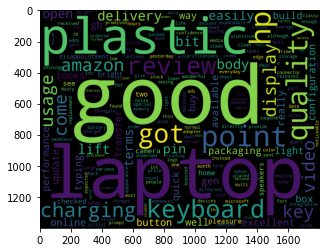

In [76]:
token1= " ".join(token1)

image = WordCloud(background_color= "black",
    width= 1800,
    height= 1400).generate(token1)

plt.imshow(image)

In [77]:
token1= token1.split(" ")

In [78]:
token1

['received',
 'yesterday',
 'prompt',
 'delivery',
 'amazon',
 'expected',
 'clarifications',
 'issue',
 'points',
 'plastic',
 'body',
 'aluminium',
 'hinges',
 'lift',
 'lower',
 'part',
 'laptop',
 'fan',
 'noise',
 'tends',
 'get',
 'bit',
 'hot',
 'special',
 'point',
 'edge',
 'lid',
 'easily',
 'open',
 'need',
 'struggle',
 'bit',
 'battery',
 'life',
 'descent',
 'normal',
 'everyday',
 'usage',
 'apprx',
 'hours',
 'quality',
 'adapter',
 'good',
 'pin',
 'connector',
 'good',
 'terms',
 'quality',
 'cautious',
 'packaging',
 'quality',
 'seemed',
 'low',
 'dusty',
 'clean',
 'lot',
 'laptop',
 'also',
 'got',
 'dust',
 'body',
 'although',
 'packed',
 'well',
 'inside',
 'plastic',
 'sheet',
 'pros',
 'configuration',
 'best',
 'price',
 'level',
 'performance',
 'excellent',
 'terms',
 'multi',
 'media',
 'usage',
 'online',
 'tasks',
 'data',
 'transfer',
 'various',
 'storage',
 'devices',
 'fast',
 'light',
 'weight',
 'plastic',
 'build',
 'plastic',
 'quality',
 'seems

In [79]:
stpwrd= ["laptop","noise","hinges","plastic","aluminium","hot","lid","battery"]
updated_stpwrd = stop_words+stpwrd

In [80]:
token2= [ w for w in token1 if w not in updated_stpwrd]

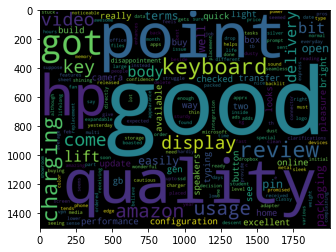

In [81]:
token2 = " ".join(token2)

updated_wordcloud = WordCloud(
    background_color = "black",
    width=2000,
    height= 1500).generate(token2)

plt.imshow(updated_wordcloud)

In [82]:
from nltk import tokenize

In [83]:
token_data = tokenize.sent_tokenize(text)

In [84]:
token_data

['Received this yesterday (04/03/2021).',
 'Prompt delivery by Amazon (as expected).',
 'Clarifications/issue points: 1.',
 'It’s a plastic body and not aluminium.',
 '2.',
 'Hinges do not lift the lower part of the laptop.',
 '3.',
 'Fan noise is there and it tends to get a bit hot.',
 '4.',
 'There’s no special point on the edge of the lid to easily open it.',
 'You need to struggle a bit.',
 '5.',
 'Battery life is descent with normal everyday usage (apprx- 5-6 hours) 6.',
 'Quality of adapter is not that good and the pin connector is not that good in terms of quality.',
 'You have to be cautious.',
 '8.',
 'The packaging quality seemed to be very low.',
 'It was all dusty.',
 'I had to clean a lot.',
 'Laptop also got some dust on it’s body although it was packed well inside a plastic sheet.',
 'Pros: 1.',
 'Configuration is best at this price level.',
 '2.',
 'Performance is excellent in terms of multi-media usage and online tasks.',
 '3.',
 'Data transfer from various storage dev

In [85]:
dataframe= pd.DataFrame(token_data, columns=['sentences'])

In [86]:
dataframe

,sentences
0,Received this yesterday (04/03/2021).
1,Prompt delivery by Amazon (as expected).
2,Clarifications/issue points: 1.
3,It’s a plastic body and not aluminium.
4,2.
...,...
74,You can see the video above attached.
75,It's too strange to see a brand new HP pavilio...
76,None of the keys working....can't even shut do...
77,The packaging too was no way near the required...


In [87]:
afinn= pd.read_csv("D:\\Data Science\\0 - ASSIGNMENTS\\Assignment11-Text Mininig\\text mining material\\New folder\\Afinn.csv")

In [88]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [89]:
affinity_score= afinn.set_index('word')['value'].to_dict()

In [90]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [91]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [92]:
sentiment_lexicons = affinity_score

In [93]:
# defining a function to find the sentiment in the text Reviews...
def sentiment_analysis(text: str = None):
    sent_score=0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicons.get(word.lemma_,0)
            
    return sent_score

In [94]:
dataframe['sentence_value']= dataframe['sentences'].apply(sentiment_analysis)

In [95]:
dataframe

,sentences,sentence_value
0,Received this yesterday (04/03/2021).,0
1,Prompt delivery by Amazon (as expected).,0
2,Clarifications/issue points: 1.,0
3,It’s a plastic body and not aluminium.,0
4,2.,0
...,...,...
74,You can see the video above attached.,0
75,It's too strange to see a brand new HP pavilio...,-1
76,None of the keys working....can't even shut do...,-4
77,The packaging too was no way near the required...,-1


In [96]:
#spliting the data to find the word count
dataframe['word count']= dataframe['sentences'].str.split().apply(len)

In [97]:
dataframe.sort_values(by='sentence_value')

,sentences,sentence_value,word count
78,Frustration....disappointment....too bad exper...,-7,3
76,None of the keys working....can't even shut do...,-4,13
73,Update after 2 weeks: Don't buy this lap ... D...,-2,13
55,People complaining about placement of Power Ke...,-2,20
10,You need to struggle a bit.,-2,6
...,...,...,...
44,Amazing laptop..,4,2
50,Build & Looks are awesome.,4,5
13,Quality of adapter is not that good and the pi...,6,19
34,Typing on the keyboard is really good and larg...,8,17


In [99]:
positive_words=dataframe[dataframe['sentence_value']>0].head()
positive_words

,sentences,sentence_value,word count
7,Fan noise is there and it tends to get a bit hot.,3,12
13,Quality of adapter is not that good and the pi...,6,19
18,I had to clean a lot.,2,6
21,Configuration is best at this price level.,3,7
23,Performance is excellent in terms of multi-med...,3,11


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

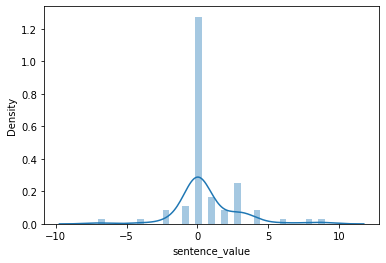

In [102]:
sns.distplot(dataframe['sentence_value'])

In [105]:
dataframe['index']= dataframe.index

<AxesSubplot:xlabel='index', ylabel='sentence_value'>

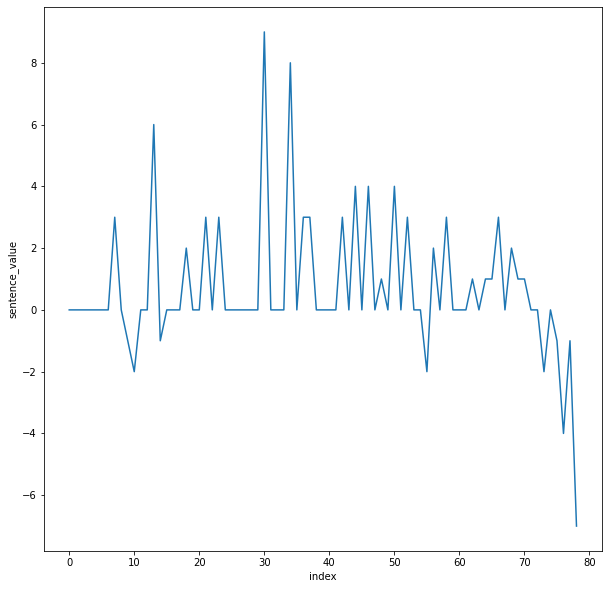

In [107]:
plt.figure(figsize=(10,10))
sns.lineplot(y='sentence_value', x='index', data= dataframe)

<AxesSubplot:title={'center':'sentiment analysis of the camera review data'}, xlabel='word count', ylabel='sentence_value'>

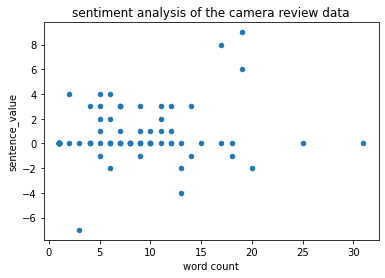

In [104]:
dataframe.plot.scatter(x='word count', y='sentence_value', title='sentiment analysis of the camera review data')